In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
age_data = pd.read_csv('gdrive/My Drive/age_gender.csv')

In [5]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [6]:
def label_age (row):
    if row['age'] > 0 and row['age'] < 8:
        return 0
    elif row['age'] > 7 and row['age'] < 16:
        return 1
    elif row['age'] > 15 and row['age'] < 26:
        return 2
    elif row['age'] > 25 and row['age'] < 36:
        return 3
    elif row['age'] > 35 and row['age'] < 46:
        return 4
    elif row['age'] > 45 and row['age'] < 66:
        return 5
    else:
        return 6

In [7]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [8]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0


In [9]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8/0.9, random_state=42)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train = np_utils.to_categorical(y_train, num_classes = 7)
y_valid = np_utils.to_categorical(y_valid, num_classes = 7)
y_test = np_utils.to_categorical(y_test, num_classes = 7)

In [11]:
X_train.shape

(18963, 48, 48, 1)

In [12]:
X_valid.shape

(2371, 48, 48, 1)

In [13]:
X_test.shape

(2371, 48, 48, 1)

In [14]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [15]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_data=(X_valid, y_valid))


Train on 18963 samples, validate on 2371 samples
Epoch 1/30
18963/18963 [==============================] - 57s 3ms/step - loss: 1.8030 - accuracy: 0.3133 - val_loss: 1.7153 - val_accuracy: 0.3463
Epoch 2/30
18963/18963 [==============================] - 49s 3ms/step - loss: 1.6256 - accuracy: 0.3788 - val_loss: 1.5187 - val_accuracy: 0.4226
Epoch 3/30
18963/18963 [==============================] - 50s 3ms/step - loss: 1.3972 - accuracy: 0.4430 - val_loss: 1.2615 - val_accuracy: 0.4842
Epoch 4/30
18963/18963 [==============================] - 50s 3ms/step - loss: 1.2705 - accuracy: 0.4819 - val_loss: 1.2127 - val_accuracy: 0.5015
Epoch 5/30
18963/18963 [==============================] - 50s 3ms/step - loss: 1.1940 - accuracy: 0.5006 - val_loss: 1.2242 - val_accuracy: 0.5086
Epoch 6/30
18963/18963 [==============================] - 50s 3ms/step - loss: 1.1219 - accuracy: 0.5349 - val_loss: 1.1051 - val_accuracy: 0.5500
Epoch 7/30
18963/18963 [==============================] - 50s 3ms/st

In [17]:
Y_test = np.argmax(y_test, axis=1)
y_pred = model.predict_classes(X_test)
target_names = ['1-7', '8-15', '16-25', '26-35', '36-45', '46-65', '66-116']
print(classification_report(Y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

         1-7       0.85      0.93      0.88       241
        8-15       0.57      0.45      0.50       121
       16-25       0.46      0.45      0.45       367
       26-35       0.56      0.57      0.57       735
       36-45       0.30      0.29      0.29       305
       46-65       0.55      0.55      0.55       429
      66-116       0.63      0.62      0.63       173

    accuracy                           0.55      2371
   macro avg       0.56      0.55      0.55      2371
weighted avg       0.54      0.55      0.54      2371



In [18]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
print(cm)

[[223  12   4   1   1   0   0]
 [ 30  54  20   9   3   5   0]
 [  4  16 165 167  10   5   0]
 [  1   4 149 422 110  42   7]
 [  2   5  19 101  89  87   2]
 [  3   2   4  52  80 234  54]
 [  0   1   0   4   6  54 108]]


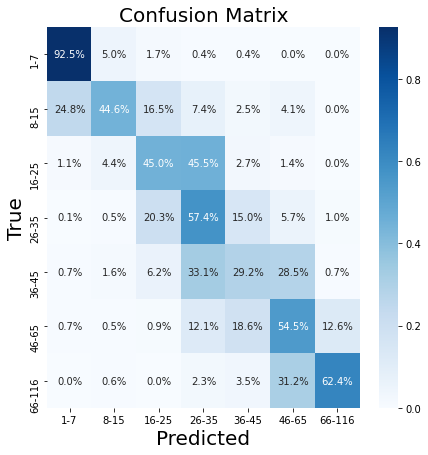

In [19]:
fig,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);